# CE888 Assignment 1 for Demo

This code is written to demonstarte data analysis made for ce888 assignment 1.

**Author**          : Tomoko Ayakawa<br> 
**Created on**      : 5 February 2019<br> 
**Last modified on**: 19 February 2019<br> 

In [52]:
# import open source libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys

# import original libraries
sys.path.append("../")

import assignment1_main as MAIN
import load_data as DATA
import histogram as HST
import correlation as CRRL
import pca as PCA
import classifier as CLS
import feature_importance as IMP

## 1. Load Data
Load data from **data** directory.<br>
Reading and preprocessing data into pandas.DataFrame are done by respective python files.<br>
#### Returned variables<br>
>`col_names` : List --- Name of the columns (including target column)<br>
`features_df` : DataFrame --- Feature values<br>
`targets_df` : DataFrame --- Target values<br>
`data_df` : DataFrame --- The whole data containing both features and targets<br>
`pic_file`: String --- Prefix for file name (data name + timestamp)<br>
`unique_labels` : List --- Column haeders containing feature names and terget name ("Class")
>

#### Select data to load (Argument `data_id`)
> 0. Human Activity
1. Spam
2. Phishing
>

In [53]:
data_id = int(input("Select the data to load (0: human activity, 1: spam, 2: phishing): "))

col_names, features_df, targets_df, data_df, pic_file = DATA.load_data(data_id=data_id)
unique_labels = DATA.verify_data(data_df, targets_df)
data_df.head(5)

Select the data to load (0: human activity, 1: spam, 2: phishing): 1
Number of NaN: 0
Data shape:  (4601, 58)
Target labels: [0 1]
The range of features:                                    Max  Min
word_freq_make                  4.540  0.0
word_freq_address              14.280  0.0
word_freq_all                   5.100  0.0
word_freq_3d                   42.810  0.0
word_freq_our                  10.000  0.0
word_freq_over                  5.880  0.0
word_freq_remove                7.270  0.0
word_freq_internet             11.110  0.0
word_freq_order                 5.260  0.0
word_freq_mail                 18.180  0.0
word_freq_receive               2.610  0.0
word_freq_will                  9.670  0.0
word_freq_people                5.550  0.0
word_freq_report               10.000  0.0
word_freq_addresses             4.410  0.0
word_freq_free                 20.000  0.0
word_freq_business              7.140  0.0
word_freq_email                 9.090  0.0
word_freq_you               

./sub\load_spam.py:66: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  data_df = data_df.convert_objects(convert_numeric=True)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,Class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


## 2. Analyse the Data

### 2-1. Data Structure
#### (1) Feature distribution

In [ ]:
HST.histogram(data_df[data_df.columns[:-1]], pic_file, "_features")

#### (2) Target distribution

In [ ]:
HST.histogram(data_df[data_df.columns[-1:]], pic_file, "_targets")

#### (3) Correlation among features

In [ ]:
cr_np = CRRL.correlation(data_df)
CRRL.cr_heatmap (cr_np, pic_file, col_names)

### 2-2. Feature importance
#### (1) Correlation with the target

In [ ]:
cr_np = CRRL.correlation(data_df)
CRRL.cr_bar_graph (cr_np, pic_file, col_names)

In [ ]:
cr_np_class = cr_np[-1][:-1]
abscr=(abs(cr_np_class))
len(abscr[abscr>0.8])

#### (2) Feature Importance based on Decision Tree

In [ ]:
clf = CLS.train (features_df, targets_df, 0)[-1]
IMP.feature_importance(clf, col_names, pic_file, pic_file.split("_")[0])

### 2-3. Principal Component Analysis (PCA)

#### (1) Plot the data in 3D

In [ ]:
%matplotlib notebook
PCA.pca(features_df, targets_df, unique_labels, pic_file)

#### (2) Explained Variance

In [ ]:
%matplotlib inline
PCA.variance(features_df, pic_file)

### 2-4. Classification with small training data
#### Obtain minimal size data

In [54]:
X, y = MAIN.get_minimal_data(features_df.values, targets_df.values)
#X, y = features_df.values, targets_df.values

ratio: 0.07698326450771571
Minimul size of the data for 57 features: 506
The size of the data used for classification: 355


#### (1) Decision Tree

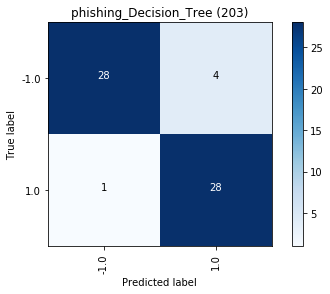

             precision    recall  f1-score   support

       -1.0       0.97      0.88      0.92        32
        1.0       0.88      0.97      0.92        29

avg / total       0.92      0.92      0.92        61



ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [49]:
title = "%s_Decision_Tree (%d)" % (pic_file.split("_")[0], len(X))
true_label, pred_label, clf = CLS.train (X, y, 0, 0)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Decision_Tree")
clf

#### (2) Naive Bayes

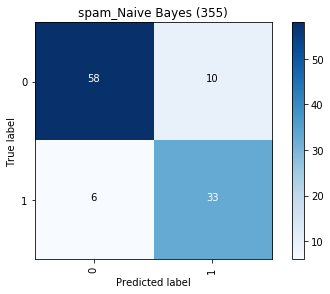

             precision    recall  f1-score   support

          0       0.91      0.85      0.88        68
          1       0.77      0.85      0.80        39

avg / total       0.86      0.85      0.85       107



GaussianNB(priors=None)

In [55]:
title = "%s_Naive Bayes (%d)" % (pic_file.split("_")[0], len(X))
true_label, pred_label, clf = CLS.train (X, y, 1, 0)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "Naive Bayes")
clf

#### (3) SVM

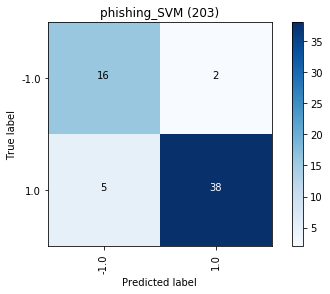

             precision    recall  f1-score   support

       -1.0       0.76      0.89      0.82        18
        1.0       0.95      0.88      0.92        43

avg / total       0.89      0.89      0.89        61



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
title = "%s_SVM (%d)" % (pic_file.split("_")[0], len(X))
true_label, pred_label, clf = CLS.train (X, y, 2, data_id)
CLS.plot_confusion_matrix(true_label, pred_label, unique_labels, pic_file, title, "SVM")
clf